In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
url=r"C:\Users\Divyansh\Desktop\udemy machine learning\codes\SVR\Position_Salaries.csv"
dataset=pd.read_csv(url)
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [3]:
X


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#avoid dummy variable
X=sc.fit_transform(X)

In [6]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
sc1=StandardScaler()
y=sc1.fit_transform(y.reshape(len(y),1))

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [9]:
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X,y)

C:\Users\Divyansh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [10]:
sc1.inverse_transform(regressor.predict(sc.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

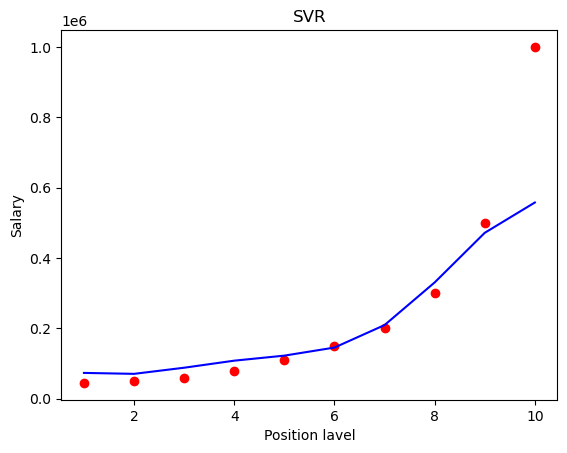

In [12]:

plt.scatter(sc.inverse_transform(X),sc1.inverse_transform(y),color="red")
plt.plot(sc.inverse_transform(X),sc1.inverse_transform(regressor.predict(X).reshape(-1,1)),color="blue")
plt.title("SVR")
plt.xlabel("Position lavel")
plt.ylabel("Salary")
plt.show()

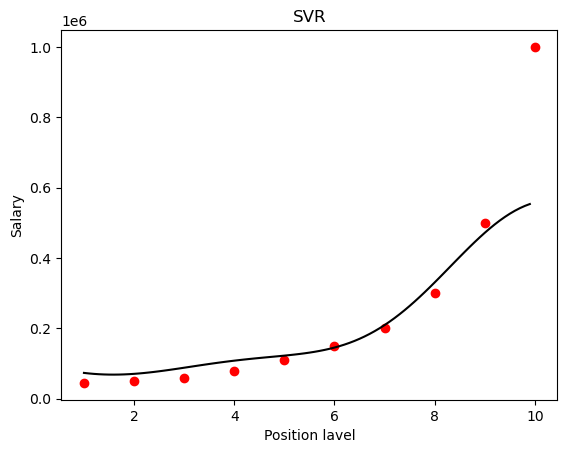

In [14]:
X_grid=np.arange(min(sc.inverse_transform(X)),max(sc.inverse_transform(X)),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.plot(X_grid,sc1.inverse_transform(regressor.predict(sc.transform(X_grid)).reshape(-1,1)),color="black")
plt.scatter(sc.inverse_transform(X),sc1.inverse_transform(y),color="red")
plt.title("SVR")
plt.xlabel("Position lavel")
plt.ylabel("Salary")
plt.show()